<a href="https://colab.research.google.com/github/NickMuhigi/Summative_Intro_To_ML_assignment.ipynb/blob/main/Summative_Intro_To_ML_%5BNicolasMuhigi%5D_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [15]:
import io
from IPython.display import display
import ipywidgets as widgets

upload = widgets.FileUpload(accept='.csv', multiple=False)
display(upload)

def handle_upload(upload_widget):
    if upload_widget.value:
        name = list(upload_widget.value.keys())[0]
        content = upload_widget.value[name]['content']
        return pd.read_csv(io.BytesIO(content))
    else:
        return None


FileUpload(value={}, accept='.csv', description='Upload')

In [16]:
df = handle_upload(upload)

if df is not None:
    df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
    df = df.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])
    df['HighMag'] = (df['Magnitude'] >= 6.0).astype(int)
    df = df[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'HighMag']]
    display(df.head())
else:
    print("❌ Please upload the dataset first.")

,Latitude,Longitude,Depth,Magnitude,HighMag
0,19.246,145.616,131.6,6.0,1
1,1.863,127.352,80.0,5.8,0
2,-20.579,-173.972,20.0,6.2,1
3,-59.076,-23.557,15.0,5.8,0
4,11.938,126.427,15.0,5.8,0


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [17]:
def define_model(optimizer='adam', use_regularizer=False, early_stopping=False, dropout=0.0, learning_rate=0.001):
    model = Sequential()
    reg = l2(0.002) if use_regularizer else None

    model.add(Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=reg))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=6, min_delta=0.002)] if early_stopping else []

    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [18]:
def loss_curve_plot(history):
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
X = df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y = df['HighMag']

# Split into 70% training and 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split 30% temp into 50/50 validation and test (i.e. 15% val and 15% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6270 - loss: 0.9565 - val_accuracy: 0.6435 - val_loss: 0.6886
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6587 - loss: 0.6663 - val_accuracy: 0.6865 - val_loss: 0.6153
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6604 - loss: 0.6485 - val_accuracy: 0.6936 - val_loss: 0.6086
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6688 - loss: 0.6498 - val_accuracy: 0.6723 - val_loss: 0.6126
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6718 - loss: 0.6265 - val_accuracy: 0.6931 - val_loss: 0.6058
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6870 - loss: 0.6138 - val_accuracy: 0.7042 - val_loss: 0.5809
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6881 - loss: 0.6040 - val_accuracy: 0.5117 - val_loss: 0.7066
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6776 - loss: 0.6088 - val_accuracy: 0.7175 - val_

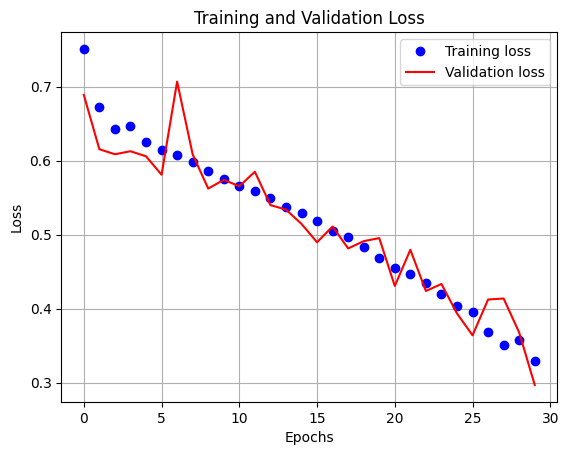

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2371
           1       0.93      0.79      0.86      1141

    accuracy                           0.91      3512
   macro avg       0.92      0.88      0.90      3512
weighted avg       0.91      0.91      0.91      3512



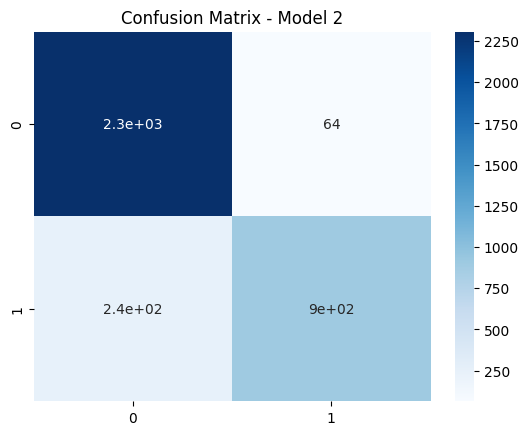

In [20]:
model_2, history_2 = define_model(optimizer='adam', early_stopping=True)
loss_curve_plot(history_2)

y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_2))

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 2")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6013 - loss: 0.9669 - val_accuracy: 0.4935 - val_loss: 1.0488
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6327 - loss: 0.7608 - val_accuracy: 0.3448 - val_loss: 1.4205
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6284 - loss: 0.7206 - val_accuracy: 0.6751 - val_loss: 0.7965
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6507 - loss: 0.6752 - val_accuracy: 0.6928 - val_loss: 0.7889
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6627 - loss: 0.6622 - val_accuracy: 0.5868 - val_loss: 0.8169
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6689 - loss: 0.6393 - val_accuracy: 0.5703 - val_loss: 0.7102
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6722 - loss: 0.6275 - val_accuracy: 0.6424 - val_loss: 0.6559
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6903 - loss: 0.6104 - val_accuracy: 0.5054 - val_

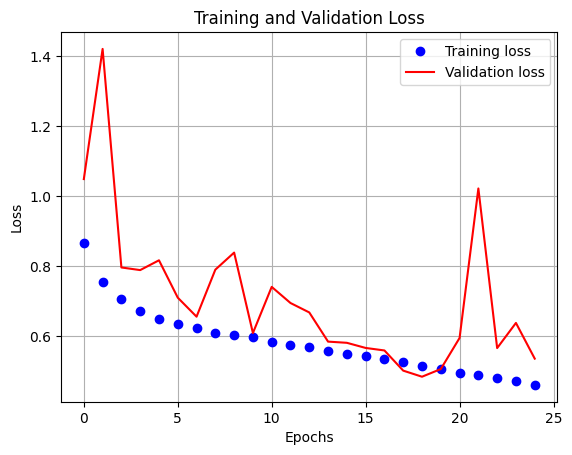

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2371
           1       0.95      0.30      0.45      1141

    accuracy                           0.77      3512
   macro avg       0.85      0.64      0.65      3512
weighted avg       0.81      0.77      0.72      3512



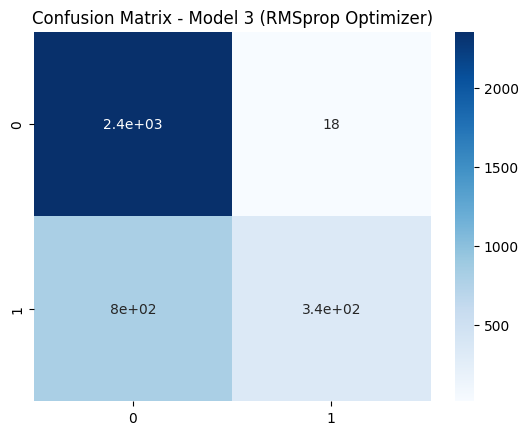

In [21]:
# TODO: Train model_3 with RMSprop optimizer and no regularization
model_3, history_3 = define_model(optimizer='rmsprop', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_3)

y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_3))

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 3 (RMSprop Optimizer)")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6118 - loss: 1.1809 - val_accuracy: 0.5589 - val_loss: 0.7633
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6202 - loss: 0.7658 - val_accuracy: 0.6902 - val_loss: 0.6214
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6382 - loss: 0.7210 - val_accuracy: 0.6928 - val_loss: 0.6806
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6419 - loss: 0.7158 - val_accuracy: 0.6105 - val_loss: 0.7051
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6553 - loss: 0.6846 - val_accuracy: 0.6879 - val_loss: 0.6344
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6720 - loss: 0.6533 - val_accuracy: 0.5709 - val_loss: 0.7291
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6673 - loss: 0.6873 - val_accuracy: 0.7238 - val_loss: 0.5916
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6960 - loss: 0.6268 - val_accuracy: 0.6996 - val_

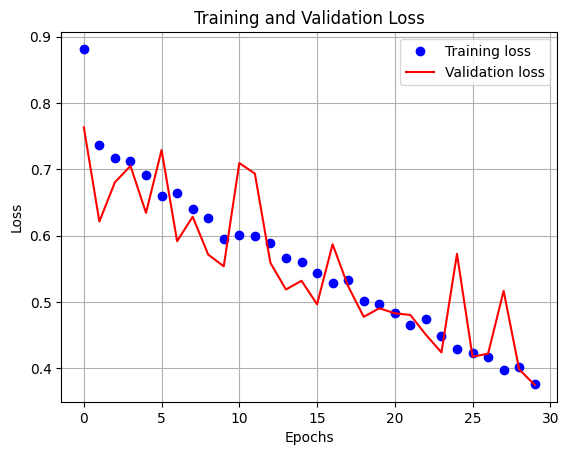

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2371
           1       0.90      0.57      0.69      1141

    accuracy                           0.84      3512
   macro avg       0.86      0.77      0.79      3512
weighted avg       0.85      0.84      0.83      3512



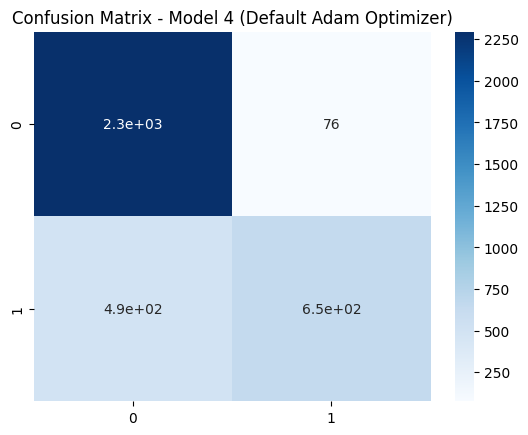

In [22]:
# TODO: Train model_4 with default optimizer (Adam) and default settings
model_4, history_4 = define_model(optimizer='adam', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_4)

y_pred_4 = (model_4.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_4))

sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 4 (Default Adam Optimizer)")
plt.show()


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2371
           1       0.93      0.79      0.86      1141

    accuracy                           0.91      3512
   macro avg       0.92      0.88      0.90      3512
weighted avg       0.91      0.91      0.91      3512

Model 2 F1 Score: 0.8551068883610451


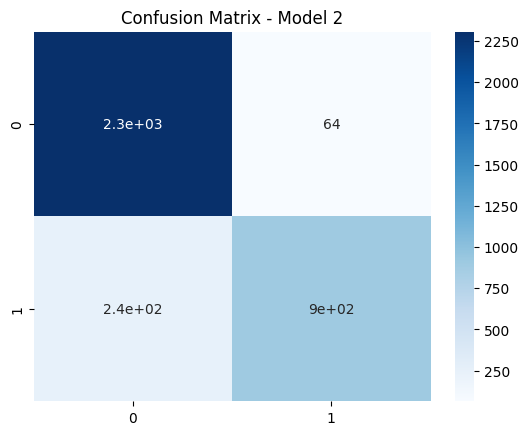

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Model 3 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2371
           1       0.95      0.30      0.45      1141

    accuracy                           0.77      3512
   macro avg       0.85      0.64      0.65      3512
weighted avg       0.81      0.77      0.72      3512

Model 3 F1 Score: 0.4515698062792251


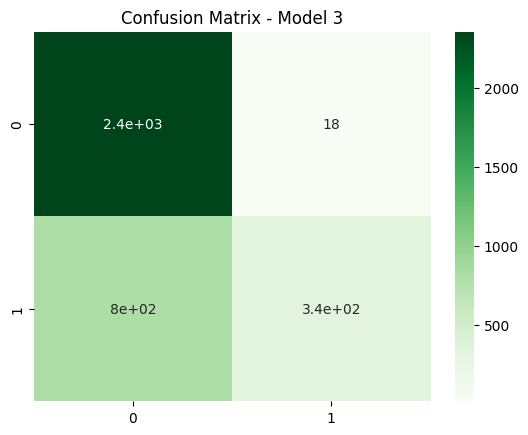

In [23]:
# Task: Make Predictions using the best saved model
# Create confusion matrix and F1 score for both models
from sklearn.metrics import f1_score

# Assuming model_2 and model_3 are your best candidates from previous steps

# Predictions from model_2
y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")
print("Model 2 Classification Report:")
print(classification_report(y_test, y_pred_2))
print(f"Model 2 F1 Score: {f1_score(y_test, y_pred_2)}")

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 2")
plt.show()

# Predictions from model_3
y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")
print("Model 3 Classification Report:")
print(classification_report(y_test, y_pred_3))
print(f"Model 3 F1 Score: {f1_score(y_test, y_pred_3)}")

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap='Greens')
plt.title("Confusion Matrix - Model 3")
plt.show()

In [24]:
# Save the best performing model for later use
best_model = model_3  # or whichever model you decide is best
best_model.save('best_earthquake_model.h5')
print("Best model saved as 'best_earthquake_model.h5'")

Best model saved as 'best_earthquake_model.h5'


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for loaded model:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2371
           1       0.95      0.30      0.45      1141

    accuracy                           0.77      3512
   macro avg       0.85      0.64      0.65      3512
weighted avg       0.81      0.77      0.72      3512



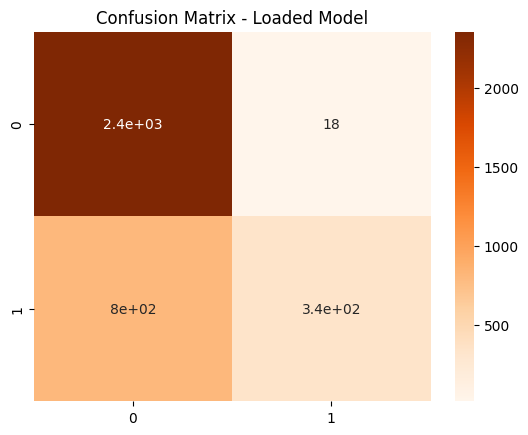

🎉 Congratulations!! Your predictions are complete.


In [25]:
# Function to load a saved model and make predictions
def make_predictions(model_path, X):
    # Load the model
    model = load_model(model_path)
    # Make predictions (probabilities)
    preds_prob = model.predict(X)
    # Convert probabilities to binary labels (threshold=0.5)
    predictions = (preds_prob > 0.5).astype("int32")
    return predictions

# Use the function with your saved model and test set
model_path = 'best_earthquake_model.h5'
predictions = make_predictions(model_path, X_test)

print("Classification Report for loaded model:")
print(classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Oranges')
plt.title("Confusion Matrix - Loaded Model")
plt.show()

print("🎉 Congratulations!! Your predictions are complete.")

Congratulations!!
